**Manual Implementation**

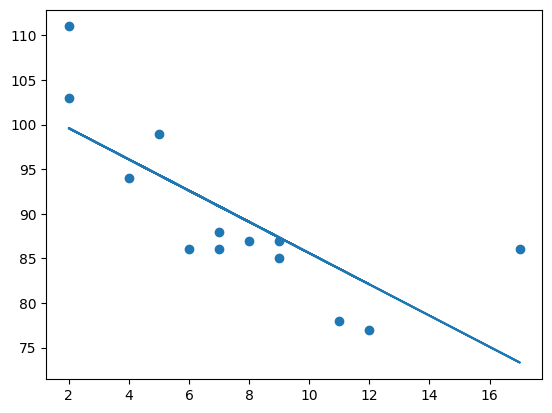

Correlation = -75.85915243761549%
Value of y for x=20 : 68.08020603384843


In [8]:
#drawing line of linear regression
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope,intercept,r,p,std_err=stats.linregress(x,y)

def reg_line(x):
    return slope * x + intercept

lin_model=list(map(reg_line,x))
plt.scatter(x,y)
plt.plot(x,lin_model)
plt.show()

#coefficient of correlation
print(f"Correlation = {r*100}%")

#predicting future values
curr_x=int(input("Enter value of x to predict y: "))
print(f"Value of y for x={curr_x} : {reg_line(curr_x)}")

   Hours_Studied  Score
0           4.06  20.74
1           9.53  46.15
2           7.45  37.71
3           6.19  21.01
4           1.98   8.80
R² Score on Test Data: 0.9210098721228542
This means model is 92.10098721228542% accurate.


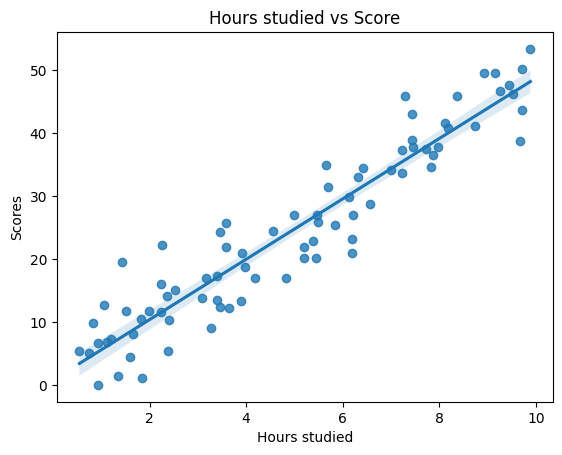

    Hours_Studied  Actual_Score  Predicted_Score
83           1.10          8.78         6.087700
53           9.00         42.48        43.919917
70           7.84         33.02        38.364806
45           6.79         29.40        33.336474
44           2.96         18.76        14.995032


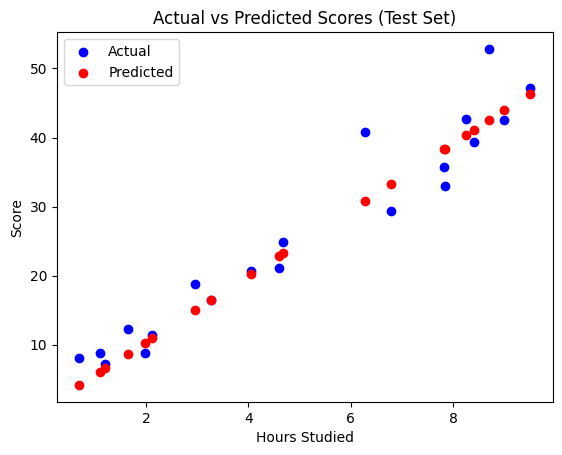

In [17]:
#using scikit learn - better to use if data is in bulk (usually used with ML)
#predicting student scores based on hours studied

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv("student_scores_dataset.csv")
print(df.head())

X=df[["Hours_Studied"]]#2D array because both samples and features are expected.
y=df["Score"]

#split into training and testing data
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #80% traning, 20% testing

#fit the training data
model = LinearRegression()
model.fit(X_train,y_train) #the model only generates the line, the data will have to be passed. 

#evaluate on test data using R^2
score = model.score(X_test,y_test)
print("R² Score on Test Data:", score)
print(f"This means model is {score*100}% accurate.")


#visualising using seaborn
#sns.regplot(x="Hours_Studied",y="Score",data=df) #x,y should match resp column names
sns.regplot(x=X_train["Hours_Studied"],y=y_train) #seaborn expects 1D array only
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Hours studied vs Score")
plt.show()


#actual vs predicted visualisation

y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Hours_Studied": X_test["Hours_Studied"],
    "Actual_Score": y_test,
    "Predicted_Score": y_pred
})

print(results.head())

plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Actual vs Predicted Scores (Test Set)")
plt.legend()
plt.show()




